In [ ]:
import cv2,os
import pandas as pd
import numpy as np
from numpy import asarray
from matplotlib import pyplot as plt
import keras
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras import Input,Model
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,Conv2DTranspose,MaxPooling2D,Concatenate,Dropout
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# Task 4 CNN

In [ ]:
#  Seting path for images
path = "/content/drive/MyDrive/gi4e_database/images"
images = os.listdir(path)
#images.remove("Thumbs.db")

In [ ]:
#  Seting path for labels
path1 = "/content/drive/MyDrive/gi4e_database/labels"
labels = os.listdir(path1)
# labels.remove("image_labels.txt")
labels.pop()

'image_labels.txt'

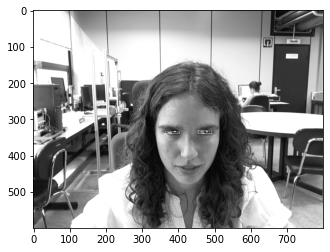

In [ ]:
# reading images and labels and visualizing image with given labels
for f in labels:
  file_path = os.path.join(path1,f)
  a=open(file_path,mode='r')
  lines=a.readline()
  for line in a:
    parts=line.split()
    image_name=parts[0]
    image_path="/content/drive/MyDrive/gi4e_database/images/" + image_name
    image=cv2.imread(image_path)
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    le_ex1=int(float(parts[1]))
    le_ey1=int(float(parts[2]))
    le_ix2=int(float(parts[3]))
    le_iy2=int(float(parts[4]))
    le_inx3=int(float(parts[5]))
    le_iny3=int(float(parts[6]))
    re_ex1=int(float(parts[7]))
    re_ey1=int(float(parts[8]))
    re_ix2=int(float(parts[9]))
    re_iy2=int(float(parts[10]))
    re_inx3=int(float(parts[11]))
    re_iny3=int(float(parts[12]))
    img_le=cv2.rectangle(image_gray, (le_ex1, le_ey1), (le_inx3, le_iny3), (255,0,0), 1)
    img_re=cv2.rectangle(img_le, (re_ex1, re_ey1), (re_inx3, re_iny3), (255,0,0), 1)
    
    image_ir = cv2.circle(img_re, (le_ix2,le_iy2), radius=2, color=(255, 255, 0), thickness=-3)
    image_ir2 = cv2.circle(image_ir, (re_ix2,re_iy2), radius=2, color=(255, 0, 0), thickness=-300)
    plt.imshow(image_ir2, cmap = 'gray')
    break
  break



In [ ]:
# reading image and croping them with given labels and save images in a new folder 
X = []
Y = []
for f in labels:
  file_path = os.path.join(path1,f)
  a=open(file_path,mode='r')
  lines=a.readline()
  for line in a:
    parts=line.split()
    image_name=parts[0]
    image_path="/content/drive/MyDrive/gi4e_database/images/" + image_name
    image=cv2.imread(image_path)
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    le_ex1=int(float(parts[1]))
    le_ey1=int(float(parts[2]))
    le_ix2=int(float(parts[3]))
    le_iy2=int(float(parts[4]))
    le_inx3=int(float(parts[5]))
    le_iny3=int(float(parts[6]))
    re_ex1=int(float(parts[7]))
    re_ey1=int(float(parts[8]))
    re_ix2=int(float(parts[9]))
    re_iy2=int(float(parts[10]))
    re_inx3=int(float(parts[11]))
    re_iny3=int(float(parts[12]))
    name=image_name.split('.')
    le_xcenter = round((le_ex1+le_inx3)/2)
    le_ycenter = round((le_ey1+le_iny3)/2)
    crpl = image_gray[le_ycenter-24:le_ycenter+24,le_xcenter-24:le_xcenter+24]
    X.append(crpl)
    cv2.imwrite("Cropped_data/"+name[0]+"_left.png", crpl)
    mask_L = np.zeros(crpl.shape[:2], dtype="uint8")
    Lx_iris =  round(le_ix2-le_xcenter+24)
    Ly_iris =  round(le_iy2 - le_ycenter+24)
    Left_iris= (Lx_iris,Ly_iris)
    image_ir = cv2.circle(mask_L, (Left_iris), radius=3, color=(255, 255, 0), thickness=-3)
    Y.append(image_ir)
    re_xcenter = round((re_ex1+re_inx3)/2)
    re_ycenter = round((re_ey1+re_iny3)/2)
    crpr = image_gray[re_ycenter-24:re_ycenter+24,re_xcenter-24:re_xcenter+24]
    X.append(crpr)
    mask_R = np.zeros(crpr.shape[:2], dtype="uint8")
    cv2.imwrite("Cropped_data/"+name[0]+"_left.png", crpr)
    Rx_iris =  round(re_ix2-re_xcenter+24)
    Ry_iris =  round(re_iy2 - re_ycenter+24)
    Right_iris = (Rx_iris,Ry_iris)
    image_ir = cv2.circle(mask_R, (Right_iris), radius=3, color=(255, 255, 0), thickness=-3)
    Y.append(image_ir)  
  #   break
  # break 

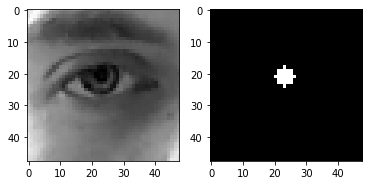

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
Y = np.array(Y)/255
ax1.imshow(X[225], cmap='gray')
ax2.imshow(Y[225], cmap='gray')

In [ ]:
# setting shape of image according to model
x = np.array(X).reshape(-1,48,48,1)
print(x.shape)
y = np.array(Y).reshape(-1,48,48,1)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2)


(2266, 48, 48, 1)
(2266, 48, 48, 1)


In [ ]:
#checking weather gpu is available or not
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
best_accuracy = 0
best_model = None
best_activation = None
best_loss = None
best_optimizer = None


for activation in ['tanh', 'relu', 'sigmoid']:
    for loss in ['mse', 'mae']:
        for optimizer in ['sgd', 'adam', 'adamax', 'rmsprop']:
            input = Input(shape = (48, 48, 1))
            a = Conv2D(64, (3, 3), activation=activation, padding='same')(input)
            b = Conv2D(64, (3, 3), activation=activation, padding='same')(a)

            c = MaxPooling2D(pool_size=(2, 2), padding='valid')(b)
            d = Conv2D(128, (3, 3), activation=activation, padding='same')(c)

            e = MaxPooling2D(pool_size=(2, 2), padding='valid')(d)
            f = Conv2D(256, (3, 3), activation=activation, padding='same')(e)

            g = Conv2DTranspose(64, (3, 3), strides=(4, 4),  activation=activation, padding='same')(f)
            h = Conv2D(64, (3, 3), activation=activation, padding='same')(g)

            i = Concatenate()([b, h])

            j = Conv2D(64, (3, 3), activation=activation, padding='same')(i)
            output0 =  Conv2D(1, (3, 3), activation='linear', padding='same')(j)

            k = Conv2D(256, (3, 3), activation=activation, padding='same')(f)
            l = Conv2D(256, (3, 3), activation=activation, padding='same')(k)

            m = Conv2DTranspose(128, (3, 3), strides=(2, 2),  activation=activation, padding='same')(l)
            n = Conv2D(128, (3, 3), activation=activation, padding='same')(m)

            o = Conv2DTranspose(64, (3, 3), strides=(2, 2),  activation=activation, padding='same')(n)
            p = Conv2D(64, (3, 3), activation=activation, padding='same')(o)

            output1 = Conv2D(1, (3, 3), activation='linear', padding='same')(p)

            model = Model(inputs=input, outputs=[output0, output1], )
            model.compile(loss = loss, optimizer = optimizer, metrics = ['accuracy'])
            model.fit(x = X_train, y = y_train, epochs = 10, verbose = 0)

            evaluation = model.evaluate(X_test, y_test)
            if (evaluation[-2] > best_accuracy):
                best_accuracy = evaluation[-2]
                best_model = model
                best_activation = activation
                best_loss = loss
                best_optimizer = optimizer

15/15 [==============================] - 2s 113ms/step - loss: 2.9820 - conv2d_606_loss: 1.4512 - conv2d_611_loss: 1.5308 - conv2d_606_accuracy: 0.9944 - conv2d_611_accuracy: 0.9944


In [ ]:
print(f"Best activator is {best_activation}")
print(f"Best loss function is {best_loss}")
print(f"Best optimizer is {best_optimizer}")

best_model.compile(loss='mse', optimizer = 'adam', metrics = ['accuracy'])
best_model.fit(x = X_train, y = [y_train, X_train], epochs = 15)

Best activator is relu
Best loss function is mse
Best optimizer is adam
Epoch 1/15
57/57 [==============================] - 26s 309ms/step - loss: 11725.8223 - conv2d_18_loss: 18.7816 - conv2d_23_loss: 11707.0371 - conv2d_18_accuracy: 0.7744 - conv2d_23_accuracy: 3.5929e-06
Epoch 2/15
57/57 [==============================] - 16s 277ms/step - loss: 329.6132 - conv2d_18_loss: 0.0494 - conv2d_23_loss: 329.5638 - conv2d_18_accuracy: 0.9706 - conv2d_23_accuracy: 6.7068e-06
Epoch 3/15
57/57 [==============================] - 16s 280ms/step - loss: 164.2332 - conv2d_18_loss: 0.0217 - conv2d_23_loss: 164.2114 - conv2d_18_accuracy: 0.9851 - conv2d_23_accuracy: 6.7068e-06
Epoch 4/15
57/57 [==============================] - 16s 280ms/step - loss: 124.7276 - conv2d_18_loss: 0.0170 - conv2d_23_loss: 124.7106 - conv2d_18_accuracy: 0.9866 - conv2d_23_accuracy: 6.7068e-06
Epoch 5/15
57/57 [==============================] - 16s 279ms/step - loss: 110.5300 - conv2d_18_loss: 0.0151 - conv2d_23_loss: 110.

<Figure size 432x288 with 0 Axes>

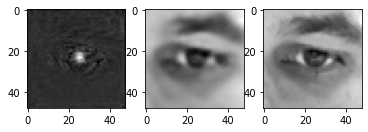

<Figure size 432x288 with 0 Axes>

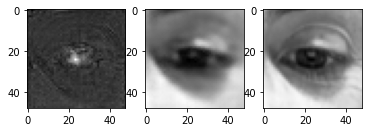

<Figure size 432x288 with 0 Axes>

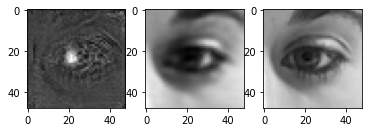

<Figure size 432x288 with 0 Axes>

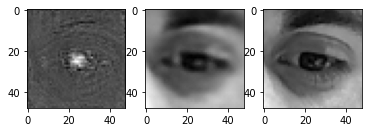

<Figure size 432x288 with 0 Axes>

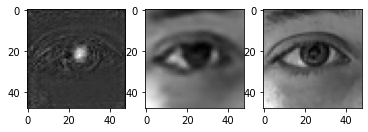

<Figure size 432x288 with 0 Axes>

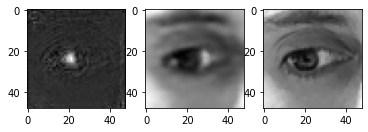

<Figure size 432x288 with 0 Axes>

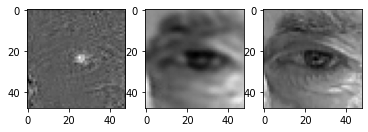

<Figure size 432x288 with 0 Axes>

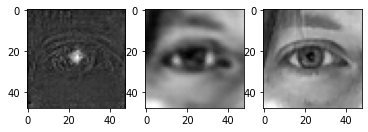

<Figure size 432x288 with 0 Axes>

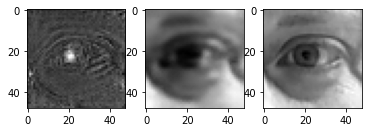

<Figure size 432x288 with 0 Axes>

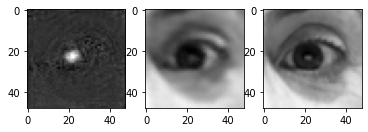

In [ ]:
(predictions0, predictions1), test_images = best_model.predict(X_test[220:230]), X_test[220:230]

for i in range(10):
    plt.figure()
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(predictions0[i], cmap='gray')
    ax2.imshow(predictions1[i], cmap='gray')
    ax3.imshow(test_images[i], cmap='gray')